In [ ]:
# install pandas
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# session 1 - 07.05.25 participants Hannah, Lena, Paula, Katharina
# 1 Data set selection 

import pandas as pd

# load data frame
df = pd.read_csv(r"alzheimerdata_with_missing_values.csv")

# show first rows for overview
df.head()

# number of columns and rows
df.shape
# we have 2149 rows and 35 columns

# culumn names
df.columns

# why did we choose this data frame?
# contains numerical (AlcoholConsumption, PhysicalActivity, SleepQuality,...); categorical data (Gender, Ethnicity, EducationLevel, Smoking,...)
# includes more than 10 input variablen -> 34
# clearly defined target variable: Diagnosis (0 = no Alzheimer; 1 = Alzheimer)
# sufficient size -> 2149 rows
# complexity: medical, demographical and cognitive data

# suitability: cleary defined binary target variable; sufficient input variables (features), sufficient size

# limitations:
# missing values?
print(df.isnull().values.sum())
# we dont have missing values   --> BEKOMMEN NOCH ANGEPASSTEN DATENSATZ


#HALLO

# Check demografic variables
gender_distribution = df['Gender'].value_counts()
age_distribution = df['Age'].describe()  # Geben Sie eine Zusammenfassung des Alters

# check for bias
print("Geschlechterverteilung:\n", gender_distribution)
print("\nAltersverteilung:\n", age_distribution)




7116
Geschlechterverteilung:
 Gender
1.0    1009
0.0     977
Name: count, dtype: int64

Altersverteilung:
 count    2149.000000
mean       74.908795
std         8.990221
min        60.000000
25%        67.000000
50%        75.000000
75%        83.000000
max        90.000000
Name: Age, dtype: float64


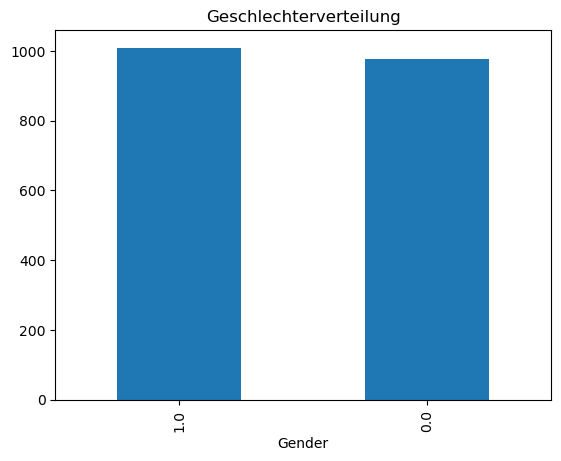

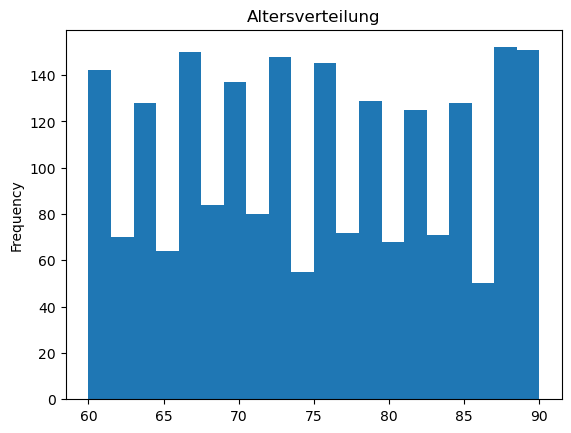

In [ ]:
import matplotlib.pyplot as plt

# show gender distribution
df['Gender'].value_counts().plot(kind='bar', title="Geschlechterverteilung")
plt.show()

# show age distribution
df['Age'].plot(kind='hist', bins=20, title="Altersverteilung")
plt.show()